In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
import pathlib

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kausthubkannan/5-flower-types-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 242M/242M [00:13<00:00, 18.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kausthubkannan/5-flower-types-classification-dataset/versions/1


In [4]:
input_dir = os.path.join(path, 'flower_images')

In [5]:
data_dir = pathlib.Path(input_dir)

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4999


In [7]:
Tulip_count = len(list(data_dir.glob('Tulip/*')))
print(Tulip_count)

1000


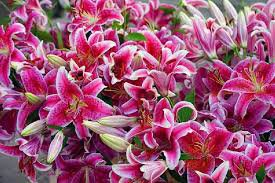

In [8]:
Lilly = list(data_dir.glob('Lilly/*'))
PIL.Image.open(str(Lilly[0]))

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 4999 files belonging to 5 classes.
Using 4000 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4999 files belonging to 5 classes.
Using 999 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']


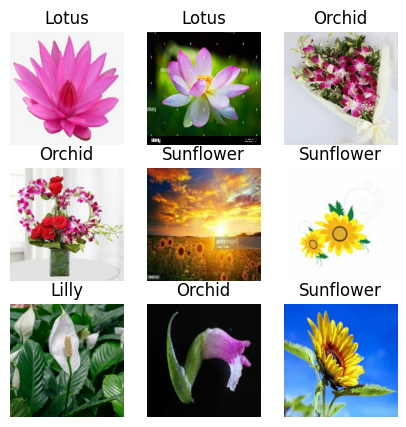

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [15]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [20]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 41, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,735,013 (6.62 MB)

 Trainable params: 1,735,013 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [23]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.4050 - loss: 1.3634 - val_accuracy: 0.5365 - val_loss: 1.1128
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.5655 - loss: 1.0437 - val_accuracy: 0.6216 - val_loss: 0.9691
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.6601 - loss: 0.8697 - val_accuracy: 0.6707 - val_loss: 0.8711
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.7481 - loss: 0.6565 - val_accuracy: 0.6747 - val_loss: 0.8916
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.8227 - loss: 0.4953 - val_accuracy: 0.7457 - val_loss: 0.7783
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.8981 - loss: 0.2935 - val_accuracy: 0.7918 - val_loss: 0.8456
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9350 - loss: 0.2027 - val_accuracy: 0.8208 - val_loss: 0.8197
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.9346 - loss: 0.1960 -

In [24]:
prediction = model.predict(val_ds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


In [25]:
print(class_names[tf.argmax(prediction[0])])

Orchid


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


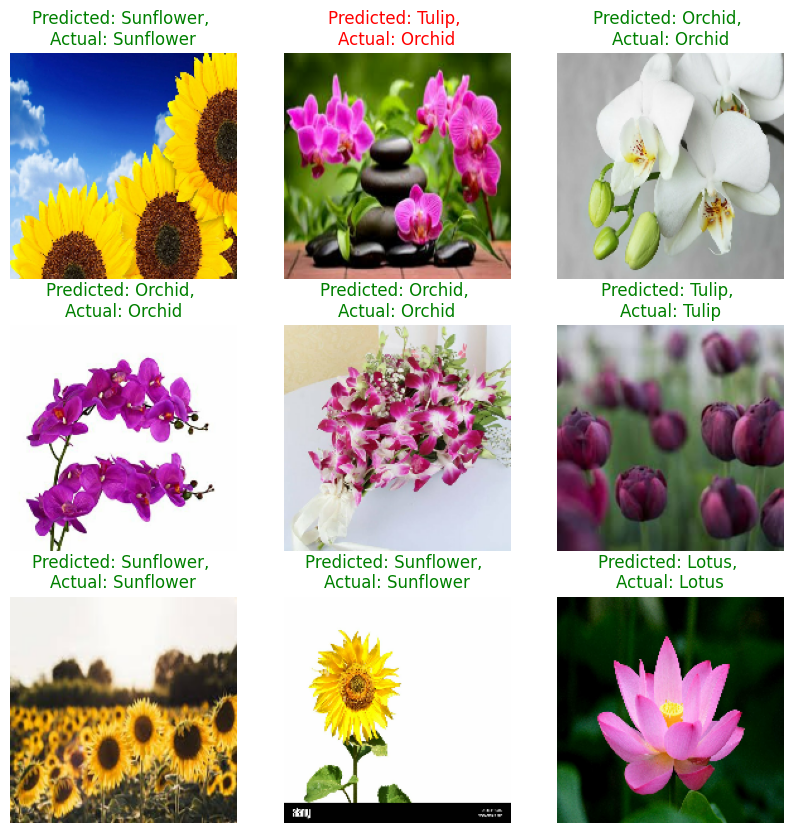

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    prediction = model.predict(images)
    ax = plt.subplot(3, 3, i+1)
    predicted_label = class_names[tf.argmax(prediction[i])] # get prediction for current image
    actual_label = class_names[labels[i]]
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"Predicted: {predicted_label}, \nActual: {actual_label}",
              color = "green" if predicted_label == actual_label else "red")
    plt.axis("off")

In [31]:
def plotlosscurve(history):
    '''function to plot training and validation loss'''
    fig, ax = plt.subplots( figsize=(5,5))
    ax.plot(history.history['loss'])
    ax.plot(history.history['val_loss'])
    plt.title('loss curve')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    ax.grid(color='black')
    plt.show()

In [32]:
def plotaccuracycurve(history):
    '''function to plot training and validation error'''
    fig, ax = plt.subplots( figsize=(5,5))
    ax.plot(history.history['accuracy'])
    ax.plot(history.history['val_accuracy'])
    plt.title('accuracy curve')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    ax.grid(color='black')
    plt.show()

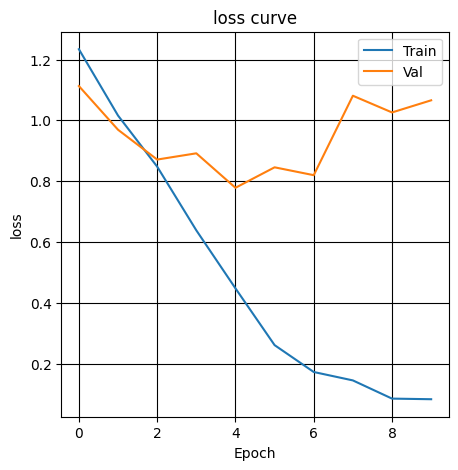

In [33]:
plotlosscurve(history)

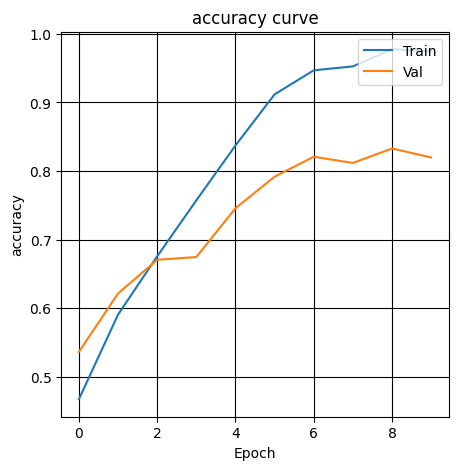

In [34]:
plotaccuracycurve(history)